In this Model I applied Linear Regression, and in order to regulate the model i used Ridge and Lasso regression. After That I used the VIF to detect mullticollinearity, and I have done feature engineering and feature slection.
In order to improve the R2 score I applied the K-Fold cross validation.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Step 2: Load Dataset

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


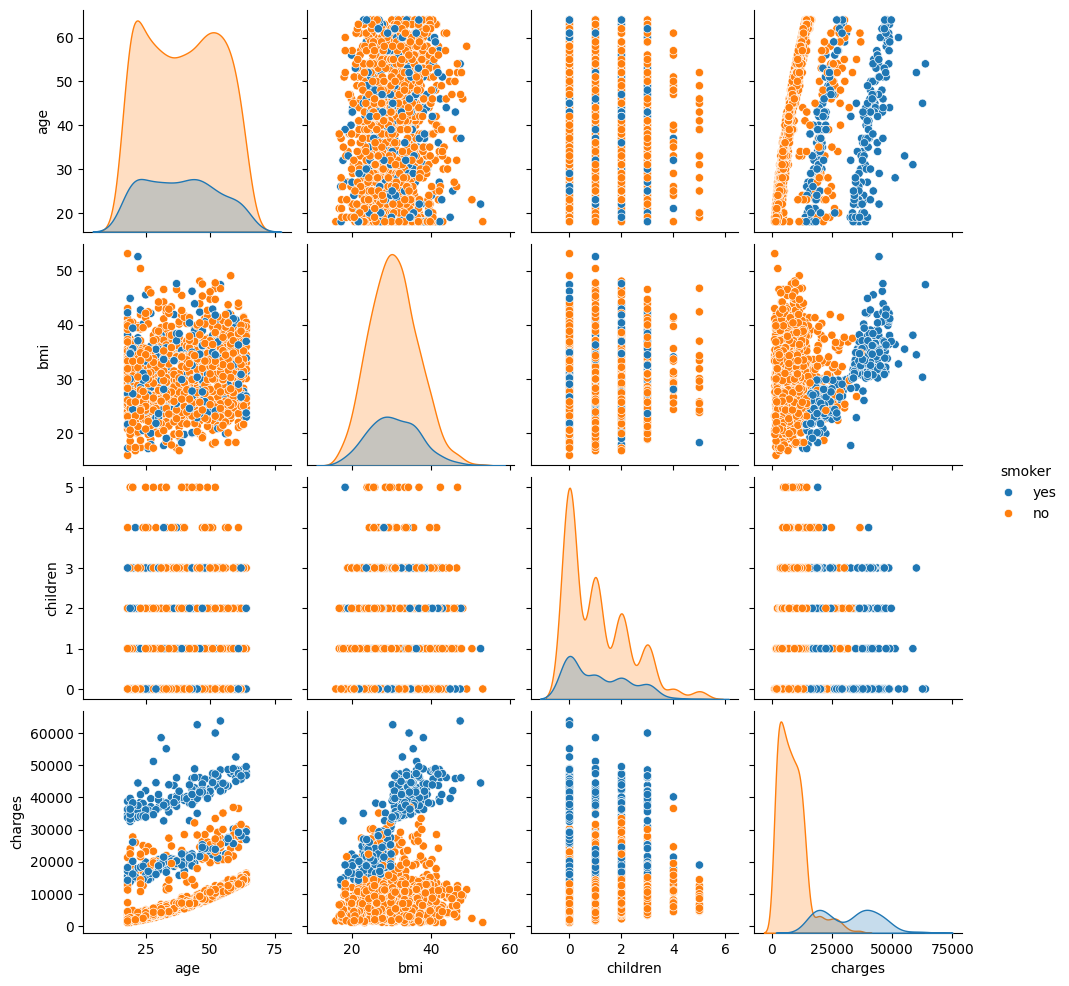

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

In [4]:
# Step 3: EDA
sns.pairplot(data, hue='smoker', diag_kind='kde')
plt.show()
print(data.info())
print(data.describe())

In [5]:
# Step 4: Data Preprocessing
# One-hot encoding for 'region'
data = pd.get_dummies(data, columns=['region'], drop_first=True)

In [6]:
# Convert 'sex' and 'smoker' to binary values
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [7]:
# Feature scaling
scaler = StandardScaler()
data[['age', 'bmi', 'charges']] = scaler.fit_transform(data[['age', 'bmi', 'charges']])

In [8]:
# Train-test split
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 5: Model Building - Simple Linear Regression
# Using 'bmi' as the predictor
X_simple = X_train[['bmi']]
model_simple = LinearRegression()
model_simple.fit(X_simple, y_train)

# Evaluate simple regression
y_pred_simple = model_simple.predict(X_test[['bmi']])
print("Simple Linear Regression R^2:", r2_score(y_test, y_pred_simple))

Simple Linear Regression R^2: 0.03970193117941867


In [10]:
# Step 5: Model Building - Multiple Linear Regression
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

In [11]:
# Evaluate multiple regression
y_pred_multiple = model_multiple.predict(X_test)
print("Multiple Linear Regression R^2:", r2_score(y_test, y_pred_multiple))
print("MAE:", mean_absolute_error(y_test, y_pred_multiple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multiple)))

Multiple Linear Regression R^2: 0.7835929767120722
MAE: 0.34539669267233747
RMSE: 0.4788147414975719


In [12]:
# Step 6: Feature Engineering
# Add interaction term and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))

Ridge Regression R^2: 0.8666275977104816
Lasso Regression R^2: 0.8658135413230658


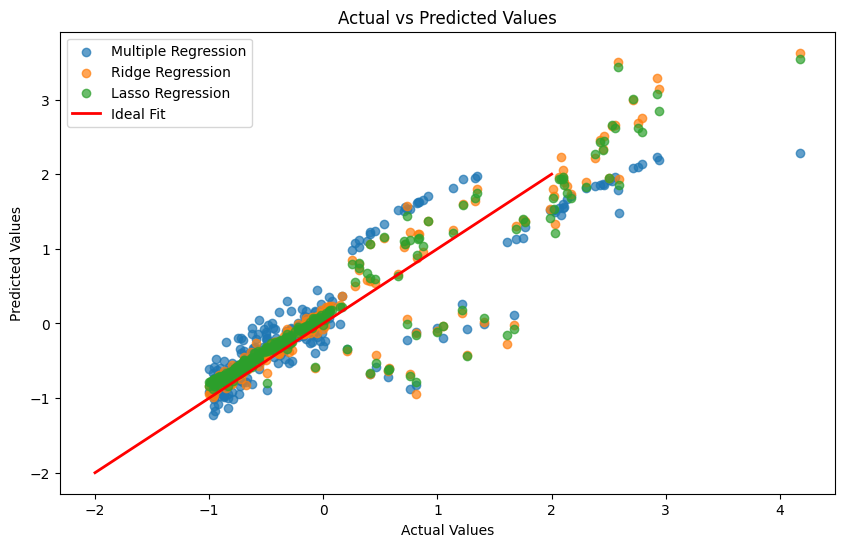

In [13]:
# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multiple, alpha=0.7, label='Multiple Regression')
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label='Ridge Regression')
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label='Lasso Regression')
plt.plot([-2, 2], [-2, 2], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()


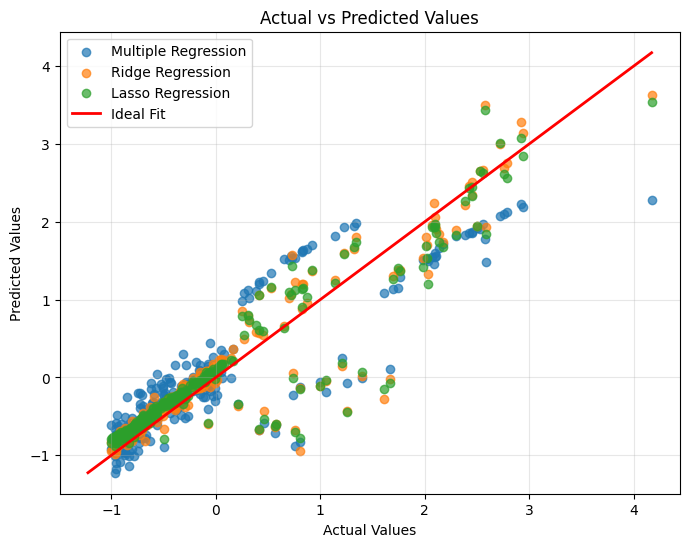

In [14]:
# Adjust the Ideal Fit Line to Extend Fully
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multiple, label='Multiple Regression', alpha=0.7)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.7)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.7)

# Extend the ideal fit line across the full range of the plot
min_val = min(y_test.min(), y_pred_multiple.min(), y_pred_ridge.min(), y_pred_lasso.min())
max_val = max(y_test.max(), y_pred_multiple.max(), y_pred_ridge.max(), y_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Fit', linewidth=2)

# Add titles, labels, and legend
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


1-Feature Engineering:

Created polynomial features for numerical columns (age, bmi, children).
Added these features back to the dataset.

2-Detecting Multicollinearity:

Calculated VIF for all features.
Removed features with VIF>10 to address multicollinearity.

3-Feature Selection with Lasso:

Used LassoCV (cross-validation) to select features by shrinking coefficients of irrelevant features to zero.
Printed the final selected features.

4-Building the Model:

Trained a linear regression model using the reduced feature set.
Evaluated the model's 𝑅2 score.

In [15]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Load the dataset (replace with your dataset path if needed)
data = pd.read_csv('insurance.csv')

# Example preprocessing: Encode categorical features
data = pd.get_dummies(data, drop_first=True)  # One-hot encode categorical variables


In [17]:
# Step 1: Feature Engineering - Add Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['age', 'bmi', 'children']])  # Example numeric columns

# Add new polynomial features to the dataset
poly_feature_names = poly.get_feature_names_out(['age', 'bmi', 'children'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
data = pd.concat([data.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

In [18]:
# Step 2: Detect Multicollinearity using VIF
X = data.drop(columns=['charges'])  # Drop target variable
y = data['charges']

# Standardize features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("VIF before feature selection:")
print(vif_data)

VIF before feature selection:
             feature        VIF
0                age        inf
1                bmi        inf
2           children        inf
3           sex_male   1.011497
4         smoker_yes   1.015114
5   region_northwest   1.529480
6   region_southeast   1.659849
7   region_southwest   1.535773
8                age        inf
9                bmi        inf
10          children        inf
11             age^2  50.006013
12           age bmi  38.376227
13      age children  10.979102
14             bmi^2  60.154999
15      bmi children  28.550762
16        children^2   7.110605


c:\Users\cheta\Python\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


The VIF (Variance Inflation Factor) being inf (infinity) means that there is perfect multicollinearity among some features. This occurs when one or more features are perfectly (or near-perfectly) correlated with other features in the dataset.

In this case, this is likely caused by the polynomial features you added (e.g., age^2, bmi^2, age bmi). These features are highly correlated with their original variables (age, bmi) because they are derived from them. This creates redundancy, leading to infinite VIF values.

In [19]:
# Drop features with high VIF (e.g., VIF > 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
X = X.drop(columns=high_vif_features)
print(f"Features removed due to high VIF: {high_vif_features}")

Features removed due to high VIF: ['age', 'bmi', 'children', 'age', 'bmi', 'children', 'age^2', 'age bmi', 'age children', 'bmi^2', 'bmi children']


In [20]:
# Step 3: Feature Selection using Lasso Regression
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LassoCV for feature selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Identify selected features
selected_features = X.columns[lasso.coef_ != 0]
print("Selected features by Lasso:")
print(selected_features)


Selected features by Lasso:
Index(['smoker_yes', 'region_southeast', 'children^2'], dtype='object')


In [21]:
# Final dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [22]:
# Step 4: Fit a Linear Regression Model with Selected Features
model = LinearRegression().fit(X_train_selected, y_train)
print("Model R^2 Score:", model.score(X_test_selected, y_test))

Model R^2 Score: 0.6616433739838326


The high 𝑅2 before feature engineering could indicate overfitting to the training data. After feature selection, the model may now generalize better, even if 𝑅2 is lower.

## Validating the Current Model

We’ll verify if the current 𝑅2 reflects better generalization.

now I want to Perform K-Fold Cross-Validation with current feature set.
Compare the cross-validation score (mean 𝑅2) to the training 
𝑅2. If the cross-validation 𝑅2 is similar to the training 𝑅2, the model is generalizing well.

In [23]:
from sklearn.model_selection import cross_val_score, KFold

# Create KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print results
print(f"Cross-Validation R^2 Scores: {cv_scores}")
print(f"Mean Cross-Validation R^2: {cv_scores.mean()}")


Cross-Validation R^2 Scores: [0.59790629 0.55888409 0.66077976 0.58478725 0.62869979]
Mean Cross-Validation R^2: 0.6062114359353157


then We can use Recursive Feature Elimination (RFE) to automate feature ranking

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Use Ridge as the base estimator
ridge = Ridge(alpha=1.0)

# Apply Recursive Feature Elimination
rfe = RFE(estimator=ridge, n_features_to_select=10)  # Adjust the number of features as needed
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train a model with selected features
X_train_selected = X_train[selected_features]
ridge.fit(X_train_selected, y_train)
print("R^2 on selected features:", ridge.score(X_train_selected, y_train))


Selected Features: Index(['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'children^2'],
      dtype='object')
R^2 on selected features: 0.6112849165021891


c:\Users\cheta\Python\venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=6. There will be no feature selection and all features will be kept.
  warnings.warn(


Let’s find the best 𝛼 using GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# GridSearch for Ridge
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# Best Ridge model
best_ridge = ridge_grid.best_estimator_
print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge R^2:", ridge_grid.best_score_)

# GridSearch for Lasso
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

# Best Lasso model
best_lasso = lasso_grid.best_estimator_
print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best Lasso R^2:", lasso_grid.best_score_)


Best Ridge Alpha: {'alpha': 1.0}
Best Ridge R^2: 0.603881680622443
Best Lasso Alpha: {'alpha': 100.0}
Best Lasso R^2: 0.6044704006751953


In [26]:
# Evaluate on validation set
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val_selected = X_val[selected_features]  # Use selected features
y_pred = best_ridge.predict(X_val_selected)

# Validation R^2
print("Validation R^2:", best_ridge.score(X_val_selected, y_val))


Validation R^2: 0.6610131429500932
